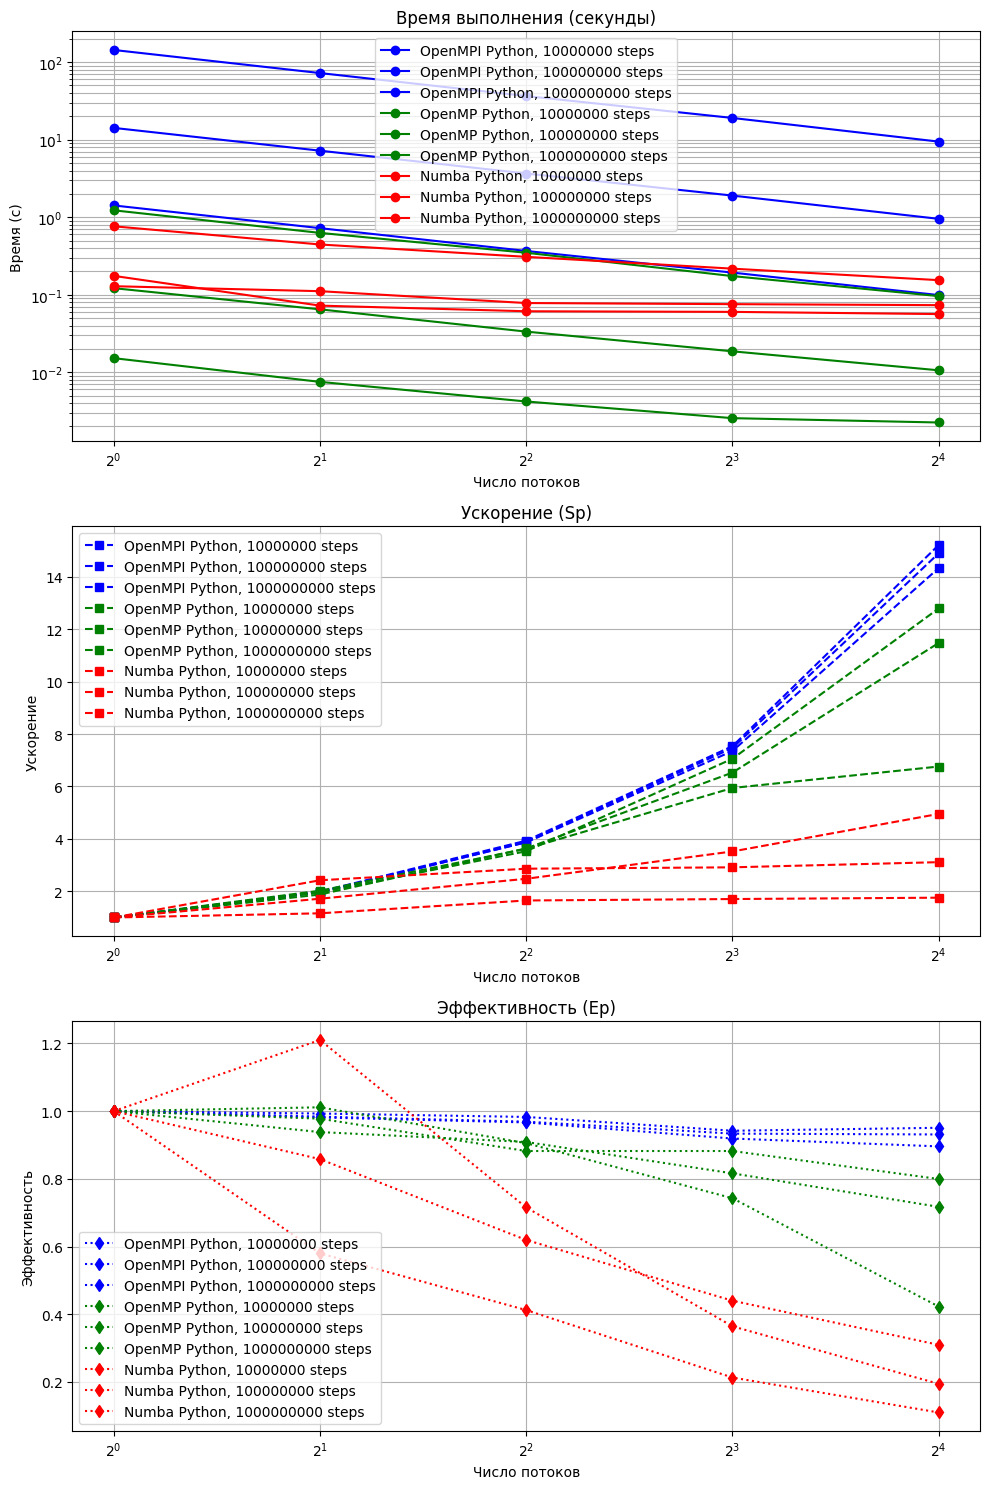

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
data = {
    "OpenMPI Python": {
        10000000: {1: 1.419, 2: 0.723, 4: 0.367, 8: 0.193, 16: 0.099},
        100000000: {1: 14.197, 2: 7.216, 4: 3.663, 8: 1.901, 16: 0.953},
        1000000000: {1: 143.671, 2: 72.348, 4: 36.544, 8: 19.063, 16: 9.444},
    },
    "OpenMP Python": {
        10000000: {1: 0.01521, 2: 0.00752, 4: 0.00420, 8: 0.00256, 16: 0.00225},
        100000000: {1: 0.12164, 2: 0.06483, 4: 0.03346, 8: 0.01863, 16: 0.01060},
        1000000000: {1: 1.228, 2: 0.628, 4: 0.348, 8: 0.174, 16: 0.096},
    },
    "Numba Python": {
        10000000: {1: 0.17522, 2: 0.07239, 4: 0.06123, 8: 0.06013, 16: 0.05632},
        100000000: {1: 0.12888, 2: 0.11115, 4: 0.07815, 8: 0.07563, 16: 0.07340},
        1000000000: {1: 0.76385, 2: 0.44503, 4: 0.30833, 8: 0.21702, 16: 0.15424},
    },
}

# Количество потоков
threads = [1, 2, 4, 8, 16]

# Цвета для разных реализаций
colors = {"OpenMPI Python": "b", "OpenMP Python": "g", "Numba Python": "r"}

# Фигуры
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Построение графиков
for implementation, datasets in data.items():
    for steps, timings in datasets.items():
        # Время работы
        times = [timings[t] for t in threads]
        axes[0].plot(threads, times, marker="o", linestyle="-", color=colors[implementation], label=f"{implementation}, {steps} steps")

        # Ускорение
        S_p = [timings[1] / timings[t] for t in threads]
        axes[1].plot(threads, S_p, marker="s", linestyle="--", color=colors[implementation], label=f"{implementation}, {steps} steps")

        # Эффективность
        E_p = [S_p[i] / threads[i] for i in range(len(threads))]
        axes[2].plot(threads, E_p, marker="d", linestyle=":", color=colors[implementation], label=f"{implementation}, {steps} steps")

# Подписи и легенды
axes[0].set_title("Время выполнения (секунды)")
axes[0].set_xlabel("Число потоков")
axes[0].set_ylabel("Время (с)")
axes[0].set_xscale("log", base=2)
axes[0].set_yscale("log")
axes[0].legend()
axes[0].grid(True, which="both")

axes[1].set_title("Ускорение (Sp)")
axes[1].set_xlabel("Число потоков")
axes[1].set_ylabel("Ускорение")
axes[1].set_xscale("log", base=2)
axes[1].legend()
axes[1].grid(True, which="both")

axes[2].set_title("Эффективность (Ep)")
axes[2].set_xlabel("Число потоков")
axes[2].set_ylabel("Эффективность")
axes[2].set_xscale("log", base=2)
axes[2].legend()
axes[2].grid(True, which="both")

plt.tight_layout()
plt.show()


### Выводы:
- OpenMPI и OpenMP показывают хорошее масштабирование с увеличением количества потоков.
- Numba демонстрирует ограниченное ускорение из-за накладных расходов на многопоточность.
- Эффективность падает с ростом количества потоков, особенно для Numba, что указывает на потери при параллелизации.

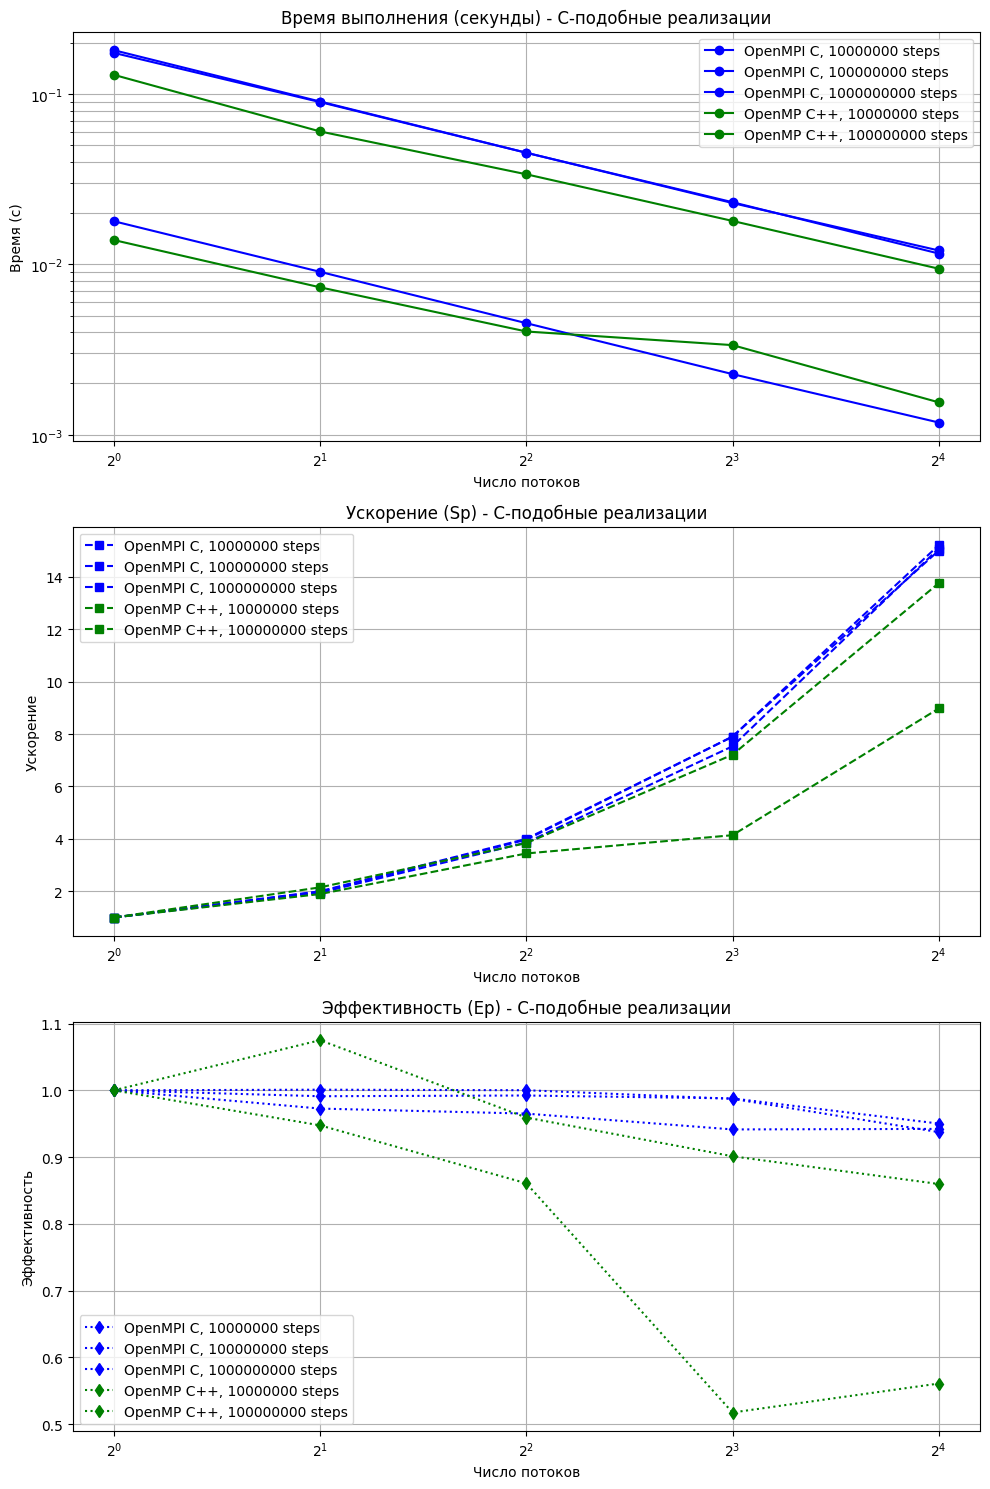

In [5]:
# Данные для C-подобных реализаций
data_c = {
    "OpenMPI C": {
        10000000: {1: 0.01794, 2: 0.00905, 4: 0.00452, 8: 0.00227, 16: 0.00118},
        100000000: {1: 0.17473, 2: 0.08982, 4: 0.04526, 8: 0.02320, 16: 0.01159},
        1000000000: {1: 0.18119, 2: 0.09051, 4: 0.04529, 8: 0.02294, 16: 0.01208},
    },
    "OpenMP C++": {
        10000000: {1: 0.01391, 2: 0.00734, 4: 0.00404, 8: 0.00336, 16: 0.00155},
        100000000: {1: 0.12985, 2: 0.06039, 4: 0.03384, 8: 0.01801, 16: 0.00944},
    },
}

# Цвета для разных реализаций
colors_c = {"OpenMPI C": "b", "OpenMP C++": "g"}

# Фигуры
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Построение графиков
for implementation, datasets in data_c.items():
    for steps, timings in datasets.items():
        # Время работы
        times = [timings[t] for t in threads if t in timings]
        valid_threads = [t for t in threads if t in timings]  # Только доступные потоки
        axes[0].plot(valid_threads, times, marker="o", linestyle="-", color=colors_c[implementation], label=f"{implementation}, {steps} steps")

        # Ускорение
        S_p = [timings[1] / timings[t] for t in valid_threads]
        axes[1].plot(valid_threads, S_p, marker="s", linestyle="--", color=colors_c[implementation], label=f"{implementation}, {steps} steps")

        # Эффективность
        E_p = [S_p[i] / valid_threads[i] for i in range(len(valid_threads))]
        axes[2].plot(valid_threads, E_p, marker="d", linestyle=":", color=colors_c[implementation], label=f"{implementation}, {steps} steps")

# Подписи и легенды
axes[0].set_title("Время выполнения (секунды) - C-подобные реализации")
axes[0].set_xlabel("Число потоков")
axes[0].set_ylabel("Время (с)")
axes[0].set_xscale("log", base=2)
axes[0].set_yscale("log")
axes[0].legend()
axes[0].grid(True, which="both")

axes[1].set_title("Ускорение (Sp) - C-подобные реализации")
axes[1].set_xlabel("Число потоков")
axes[1].set_ylabel("Ускорение")
axes[1].set_xscale("log", base=2)
axes[1].legend()
axes[1].grid(True, which="both")

axes[2].set_title("Эффективность (Ep) - C-подобные реализации")
axes[2].set_xlabel("Число потоков")
axes[2].set_ylabel("Эффективность")
axes[2].set_xscale("log", base=2)
axes[2].legend()
axes[2].grid(True, which="both")

plt.tight_layout()
plt.show()


### Выводы:
- OpenMPI C показывает лучшее ускорение, чем OpenMP C++, особенно при большем количестве потоков.
- OpenMP C++ демонстрирует чуть меньшую эффективность, что может быть связано с особенностями параллельного исполнения.
- Эффективность снижается с увеличением количества потоков, особенно для OpenMP C++.